# Persistencia homológica

## Preyecto 

In [27]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import pandas as pd

Importamos nuestra base de datos

In [2]:
data = pd.read_csv ("Mine.csv")

In [3]:
missingCount = data.isnull().sum()
missingCount

V    0
H    0
S    0
M    0
dtype: int64

In [4]:
totalMissing = missingCount.sum()
totalMissing

0

### Visualizaremos nuestra tabla de datos
Nuestra base de datos esta normalizada y limpia, inicialmente los valores de la columna "S" eran categoricos, la misma nase de datos extraida de kaggle ya los habia normalizado

In [5]:
data.head()

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


Analicemos el diagrama:

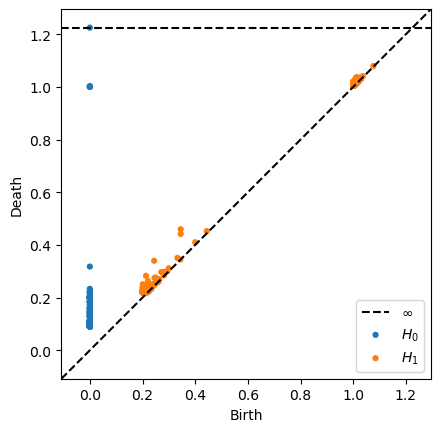

In [14]:
diagrams = ripser(data)['dgms']
plot_diagrams(diagrams, show=True)

### Interpretacion de los diagramas de persistencia

**Puntos Persistentes:** El punto azul que se extiende verticalmente sugiere una característica que permanece durante un rango considerable de parámetros de escala. Esta componente persiste a treves del tiempo, probablemente sus propiedades son muy significativas, ya que esta no se une a otra componente, si no que las otras componente con caracteristicas similares se uniran a ella.

**Otros Puntos Azules:** Estos otros puntos azules más bajos que desaparecen rápidamente (cerca de la diagonal) probablemente representan ruido o clústeres menos significativos que se fusionan a componentes más grandes a medida que aumenta el umbral.

**Bucles Persistentes:** Cuanto más altos y más lejos de la diagonal estén los puntos naranjas, más significativos son estos bucles. Estas características sugieren que hay estructuras circulares o cíclicas en los datos, que podrían indicar patrones regulares o repetitivos en cómo varían las mediciones del sensor con el voltaje y la altura en diferentes condiciones del suelo.

**Componentes Conectados (H0):**

El componente H0 altamente persistente podría sugerir un rango particular o agrupamiento de configuraciones del sensor que detecta consistentemente la presencia o ausencia de minas, sin verse afectado por cambios en la altura o ligeras variaciones en el voltaje.
También podría indicar robustez contra el ruido y la variabilidad en las mediciones, sugiriendo condiciones de detección confiables.

**Bucles o agujeros en (H1):**

Los bucles persistentes podrían sugerir que hay combinaciones específicas de altura y voltaje que conducen cíclicamente a lecturas similares del sensor, potencialmente indicativas de condiciones similares de detección de minas. Por ejemplo, un bucle podría ocurrir si aumentar y luego disminuir la altura del sensor lleva a un retorno a niveles de voltaje similares, posiblemente debido a que el sensor vuelve a encontrar campos magnéticos subterráneos similares o tipos de minas.
Estos bucles también podrían ser indicativos de la interacción entre las configuraciones del sensor y diferentes tipos de suelo, que podrían afectar la distorsión magnética detectada por el sensor.

Con "maxdim" podemos ver homología de mayores dimensiones:

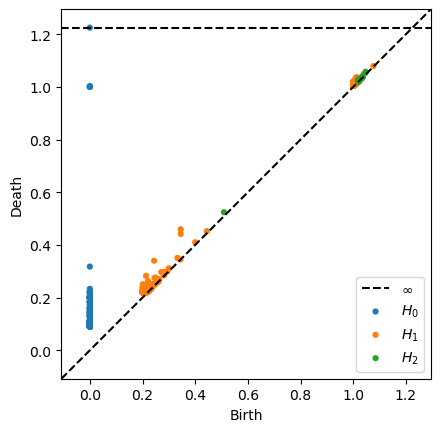

In [32]:
diagrams1 = ripser(data, maxdim=2)['dgms']
plot_diagrams(diagrams1, show=True)

**Puntos verdes (H2):**

Estos puntos indican la presencia de cavidades tridimensionales (voids). Estas son características topológicas más complejas y menos comunes en muchos conjuntos de datos. En el contexto de detección de minas, una cavidad podría interpretarse como una configuración de valores donde un conjunto encerrado de condiciones de sensor (voltaje y altura sobre variados tipos de suelo) crea un "vacío" en el espacio de medición, posiblemente indicando un área específicamente sensible o reactiva en términos de detección de minas. La presencia de estos puntos podría sugerir zonas de alta sensibilidad donde las configuraciones del sensor deben ser manejadas con cuidado para evitar falsos positivos o falsos negativos.

Estas características topológicas pueden ser útiles para desarrollar modelos predictivos más robustos que consideren no solo las mediciones individuales, sino también las relaciones entre ellas a través de diferentes configuraciones.

Podemos visualizar el diagrama para solamente una dimensión:

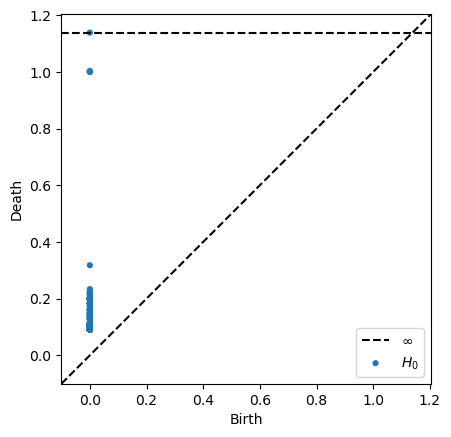

In [9]:
plot_diagrams(diagrams, plot_only=[0])

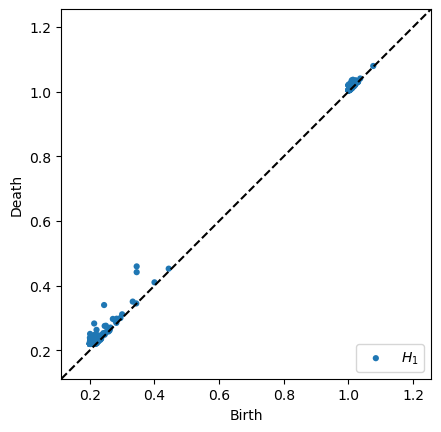

In [10]:
plot_diagrams(diagrams, plot_only=[1])

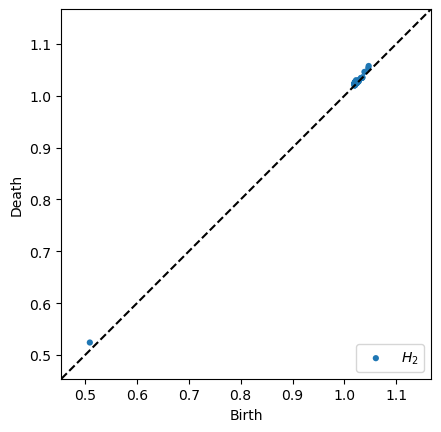

In [12]:
plot_diagrams(diagrams, plot_only=[2])

Creamos el codigo de barras pde la filtracion

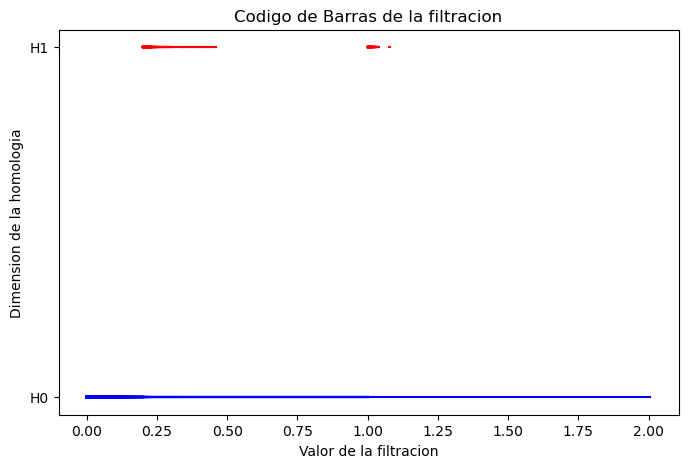

In [30]:
# Preparamos el grafico
fig, ax = plt.subplots(figsize=(8, 5))

# Recorremos cada dimension y cada punto del codigo de barras correspondiente
colors = ['b', 'r', 'g']  # Colors for dimensions 0, 1, 2
for dim in range(len(diagrams)):
    dgm = diagrams[dim]
    for interval in dgm:
        birth = interval[0]
        death = interval[1]
        if death == float('inf'):  # Remplazamos infinito por un valor maximo solo para el uso de la grafica
            death = 2 * max(dgm[:, 1][np.isfinite(dgm[:, 1])])  # El doble del timepo maximo de muerte finito
        ax.plot([birth, death], [dim + 0.1, dim + 0.1], c=colors[dim])  # Desplazado por 0.1 para mayor claridad

# Customize the plot
ax.set_title('Codigo de Barras de la filtracion')
ax.set_xlabel('Valor de la filtracion')
ax.set_ylabel('Dimension de la homologia')
ax.set_yticks([i + 0.1 for i in range(len(diagrams))])
ax.set_yticklabels([f'H{i}' for i in range(len(diagrams))])

plt.show()


### Interpretación del Código de Barras

**H0 (Componentes Conectados)**:
   - **Barra Azul**:
La barra horizontal azul en la dimensión H0, representa muchas componente que van nacieendo y muriendo, mientras mas gruesa la linea se infiere que hay una mayor cantidad de componentes vivas en ese momento de la filtracion. De igual manera como la linea azul es continua, se infiere que una componente nace muy temprano en la filtración y no muere. Esto indica que esta componente principal engloba la mayoría de los datos a lo largo de todo el rango de filtración. Esto podria significar que existe una configuración de condiciones (voltaje y altura del sensor) que se mantiene cohesivo y prominente a través de variaciones considerables, posiblemente representando una condición común o estándar de medición sin presencia de minas o con un tipo específico de mina que no cambia significativamente con las variaciones de los parámetros medidos.

**H1 (Bucles o Agujeros)**:
   - **Barra Roja Corta**:
La barra corta en rojo en la dimensión H1 indica la existencia de un bucle que nace y muere dentro de un rango bastante limitado de la filtración o inclusive casi muere al mismo momento que nace. El bucle al cerrarse rapidamente (en términos de análisis de datos) puede interpretarse como un patrón cíclico o una dependencia que solo es relevante bajo condiciones muy específicas de los parámetros medidos. Esta característica podría representar un comportamiento inusual o una configuración específica de los parámetros del sensor que detecta una característica particular del entorno o del tipo de mina, pero que no perdura a medida que esos parámetros cambian.

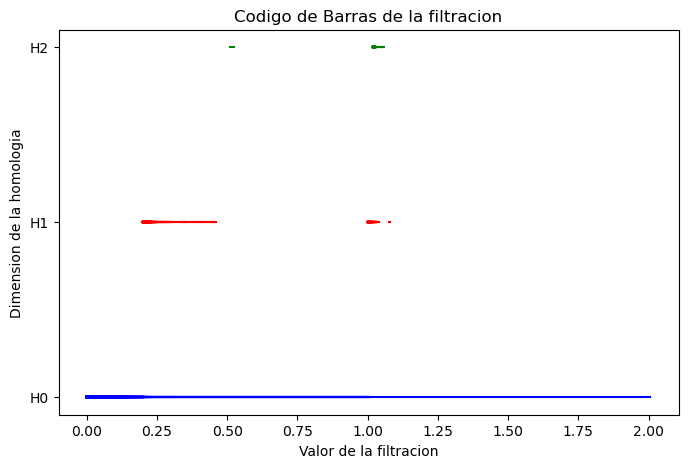

In [33]:
# Preparamos el grafico
fig, ax = plt.subplots(figsize=(8, 5))

# Recorremos cada dimension y cada punto del codigo de barras correspondiente
colors = ['b', 'r', 'g']  # Colors for dimensions 0, 1, 2
for dim in range(len(diagrams1)):
    dgm = diagrams1[dim]
    for interval in dgm:
        birth = interval[0]
        death = interval[1]
        if death == float('inf'):  # Remplazamos infinito por un valor maximo solo para el uso de la grafica
            death = 2 * max(dgm[:, 1][np.isfinite(dgm[:, 1])])  # El doble del timepo maximo de muerte finito
        ax.plot([birth, death], [dim + 0.1, dim + 0.1], c=colors[dim])  # Desplazado por 0.1 para mayor claridad

# Customize the plot
ax.set_title('Codigo de Barras de la filtracion')
ax.set_xlabel('Valor de la filtracion')
ax.set_ylabel('Dimension de la homologia')
ax.set_yticks([i + 0.1 for i in range(len(diagrams1))])
ax.set_yticklabels([f'H{i}' for i in range(len(diagrams1))])

plt.show()


**H2 (Cavidades)**:
   - **Barra Verde Corta**:
Su presencia sugiere que puede haber una configuración compleja de condiciones que crea un "espacio" claramente delimitado en los datos. En el contexto de detección de minas, esto podría interpretarse como una zona particularmente sensible o una configuración de parámetros del sensor que necesita ser manejada con cuidado para evitar interpretaciones erróneas.

**¿Cuántas características son esencialmente importantes en la base de datos?**

Mi base de datos son 4 columnas, (el voltaje del sensor, la altura entre el sensor y el piso, el tipo de suelo,  el tipo de mina), Comparando nuestros diagramas de persistencia podemos ver que las 3 caracteristicas usadas son importantes, el voltaje aunque cambie va a ser lo que se mantenga constante como nuestra componente, por l acual es importante. Ahora cuando analizamos nuestra varible de altura podemos ver que se generan diferentes ciclos lo cual nos puede dar informacion de ciertos patrones, estas dinamicas simples son muy importantes para el analisis, y como ultimo nuestras cavidades, ya que si queremos aplicar el mismo voltaje para todos los tipos de suelo podriamos tener falsos positivos u falsos negativos. Ya que el estado del suelo puede hacer que el sensor malinterprete los resultados. Por lo que estas cavidades en H2 que tenemos son datos que nos ayudan a determinar nuevos casos (sugieren complejidades adicionales) para cada tipo de suelo y despues formular que tipo de voltaje y que altura son necesarios para que la deteccion sea mas facil.

**¿Tiene alguna relación con lo obtenido con el Algoritmo Mapper (en caso de utilizar la misma base)??**

No se puede seterminar porque se hizo el proyecto con una base de datos distinta.

### Distancia entre diagramas (Adicional)

Usaremos la paquetería persim, la cual nos permite calcular distancias entre diagramas de persistencia: 

In [28]:
import persim

Calculemos las distancias d cuello de botella de los diagramas de los círculos de $H_0$.

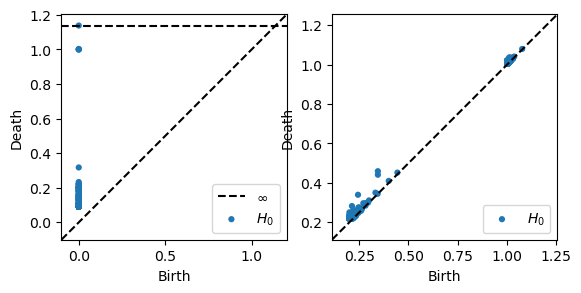

In [40]:
dgms1 = ripser(data)['dgms'][0]
dgms2 = ripser(data)['dgms'][1]

plot_diagrams(dgms1, ax=plt.subplot(121))
plot_diagrams(dgms2, ax=plt.subplot(122))

In [53]:
distance_bottleneck, matching = persim.bottleneck(dgms1, dgms2, matching=True)

C:\Users\Propietario\anaconda3\Lib\site-packages\persim\bottleneck.py:55: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(


Visualizamos:

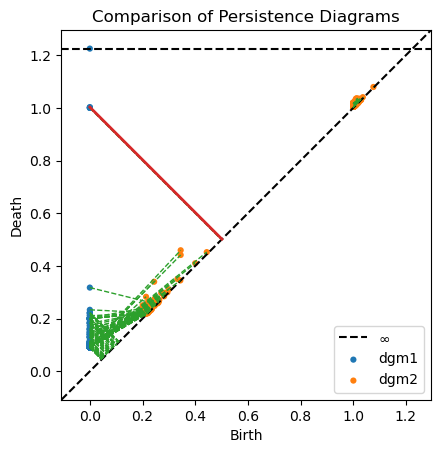

In [52]:
persim.bottleneck_matching(dgms1, dgms2, matching) 
plt.title('Comparison of Persistence Diagrams')

# Display the plot with updated labels and title
plt.show()

Si solamente queremos la distancia:

In [54]:
print(distance_bottleneck)
persim.bottleneck(dgms1, dgms2)

0.5015401244163513


0.5015401244163513